In [6]:
from keras.models import load_model


In [7]:
model = load_model('face_recog_model.h5')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [8]:
# get new model
new_model = load_model('face_recog_model.h5')


In [9]:
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [10]:
new_model.layers

In [11]:
new_model.metrics


In [12]:
new_model.loss

<function keras.src.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

In [13]:
test_path = 'dataset/train_data'
from keras.preprocessing.image import ImageDataGenerator
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['0', '1', '2', '3'], batch_size=10)



Found 0 images belonging to 4 classes.


In [14]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import numpy as np
def extract_face(img):
    detector = MTCNN()
    faces = detector.detect_faces(img)
    images = []
    for face in faces:
        x, y, width, height = face['box']
        x2, y2 = x + width, y + height
        face_boundary = img[y:y2, x:x2]
        face_image = cv2.resize(face_boundary, (224, 224))
        images.append(face_image)
    return images

In [74]:
classes = ['Pond', 'Adex', 'Blue', 'New']
def predict_class(model, img):
    faces = extract_face(img)
    face = cv2.resize(faces[0], (224, 224), interpolation=cv2.INTER_AREA)
    new_face = face.astype('float32')
    new_face = new_face / 255.0
    new_face = np.expand_dims(face, axis=0)
    pred = model.predict(new_face)
    return face, pred

1/1 [==============================] - 0s 327ms/step


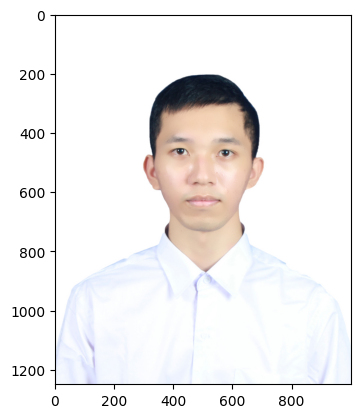

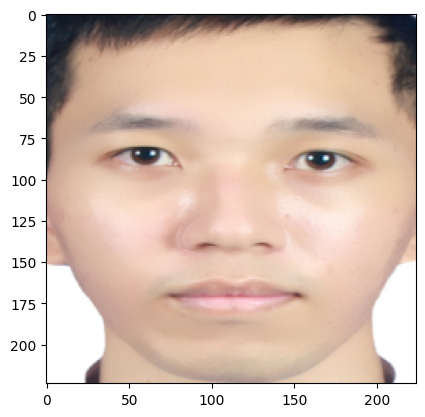

In [75]:
test_image = cv2.imread('profile.jpg')
# faces = extract_face(test_image)
from keras.models import Model
last_two_layers = Model(inputs=model.input, outputs=model.layers[-2].output)
face, x = predict_class(last_two_layers, test_image)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

plt.show()
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()

In [64]:
x.shape

(1, 64)

In [76]:
weights = model.layers[-1].get_weights()[0]

In [60]:
weights.shape

(64, 4)

In [77]:
# x cros with weights and then get last layer output 1x4 before softmax
result = np.dot(x, weights)

In [79]:
result

array([[-18.674496 ,  -7.8144197,  68.733215 , -18.74003  ]],
      dtype=float32)

In [39]:
test_image = cv2.imread('dataset/train_data/class-0/32.jpg')

In [42]:
last_two_layers = Model(inputs=model.input, outputs=model.layers[-2].output)

In [43]:
last_two_layers.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  